/tmp/ipykernel_30468/1197634429.py:10: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  plt.scatter(X[:, 0], X[:, 1], s=50, cmap='viridis')


Text(0.5, 1.0, 'Data Distribution')

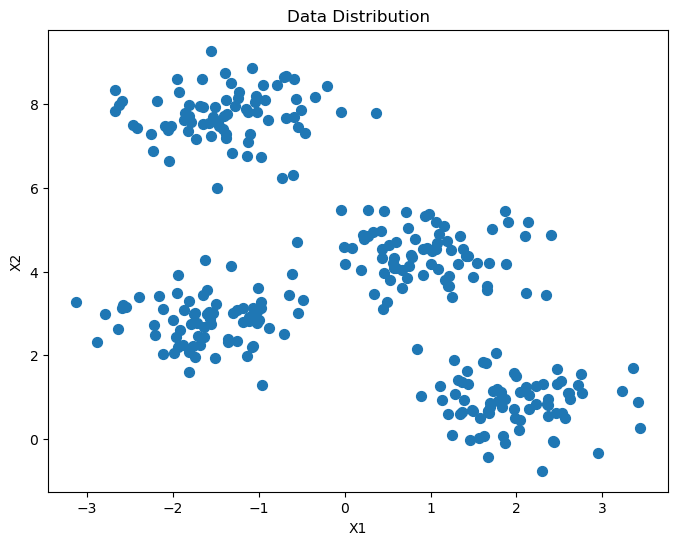

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs

# Generate synthetic data
X, _ = make_blobs(n_samples=300, centers=4, cluster_std=0.60, random_state=0)

# Visualize the data
plt.figure(figsize=(8, 6))
plt.scatter(X[:, 0], X[:, 1], s=50, cmap='viridis')
plt.xlabel('X1')
plt.ylabel('X2')
plt.title('Data Distribution')

In [2]:
# Define a function to compute Euclidean distance
def euclidean_distance(x1, x2):
    return np.sqrt(np.sum((x1 - x2) ** 2))

In [3]:

# Implement K-means algorithm
class KMeans:
    def __init__(self, n_clusters, max_iters=100):
        self.n_clusters = n_clusters
        self.max_iters = max_iters

    def fit(self, X):
        # Randomly initialize cluster centers
        idx = np.random.choice(len(X), self.n_clusters, replace=False)
        self.centers = X[idx]

        for _ in range(self.max_iters):
            # Assign each data point to the nearest cluster
            clusters = [[] for _ in range(self.n_clusters)]
            for point in X:
                distances = [euclidean_distance(point, center) for center in self.centers]
                cluster_idx = np.argmin(distances)
                clusters[cluster_idx].append(point)

            # Update cluster centers
            prev_centers = self.centers.copy()
            for i in range(self.n_clusters):
                self.centers[i] = np.mean(clusters[i], axis=0)

            # Check for convergence
            if np.allclose(prev_centers, self.centers):
                break

    def predict(self, X):
        # Assign each data point to the nearest cluster
        clusters = [[] for _ in range(self.n_clusters)]
        for point in X:
            distances = [euclidean_distance(point, center) for center in self.centers]
            cluster_idx = np.argmin(distances)
            clusters[cluster_idx].append(point)
        return clusters

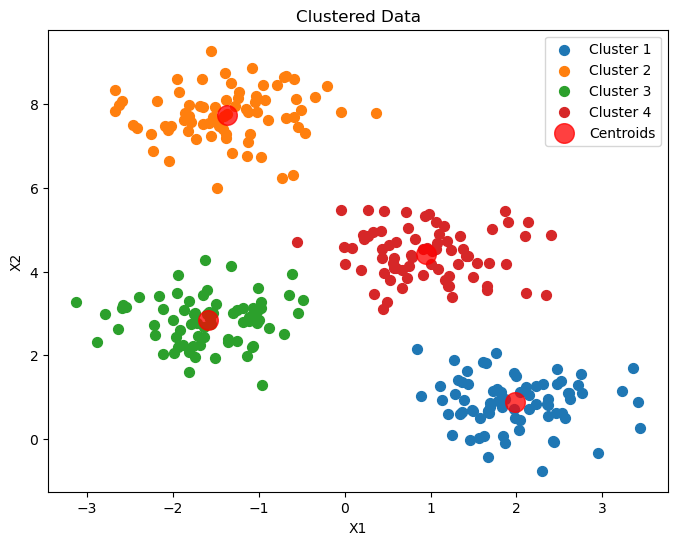

In [4]:
# Perform K-means clustering
kmeans = KMeans(n_clusters=4)
kmeans.fit(X)
clusters = kmeans.predict(X)

# Visualize the clustered data
plt.figure(figsize=(8, 6))
for i in range(kmeans.n_clusters):
    cluster = np.array(clusters[i])
    plt.scatter(cluster[:, 0], cluster[:, 1], label=f'Cluster {i+1}', s=50)
plt.scatter(kmeans.centers[:, 0], kmeans.centers[:, 1], c='red', s=200, alpha=0.75, label='Centroids')
plt.xlabel('X1')
plt.ylabel('X2')
plt.title('Clustered Data')
plt.legend()
plt.show()